In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df=pd.read_csv("C:\\Users\\shast\\Downloads\\Indian automoble buying behavour study 1.0.csv")
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [3]:
df.shape

(99, 13)

In [4]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


Statistical Analysis

In [6]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [7]:
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

Visualising data columns

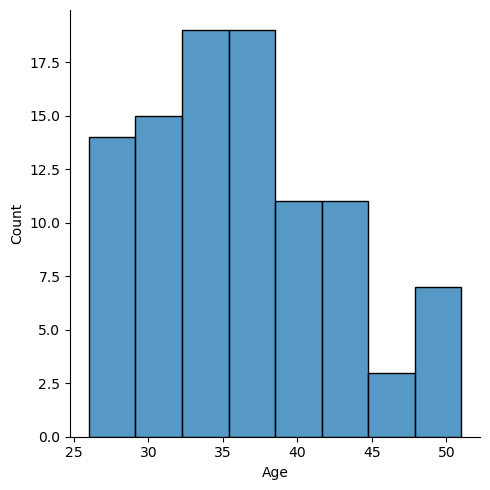

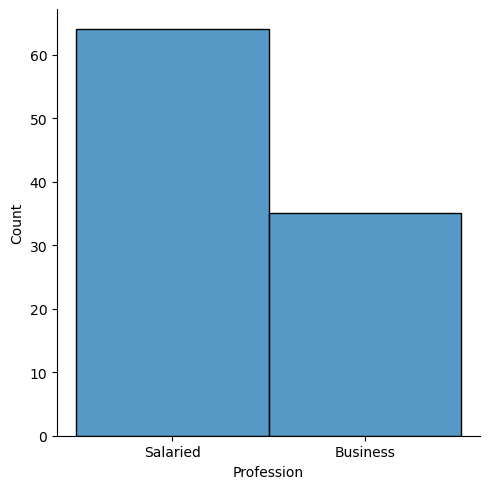

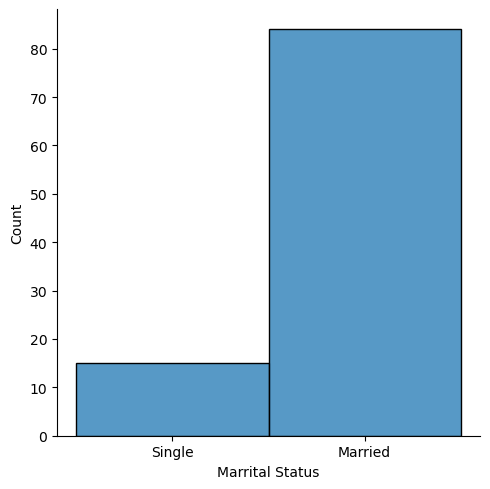

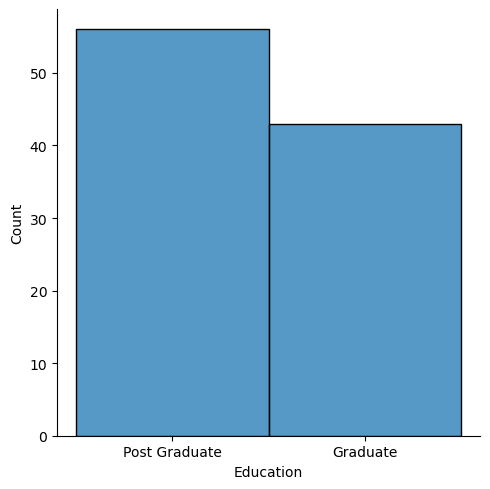

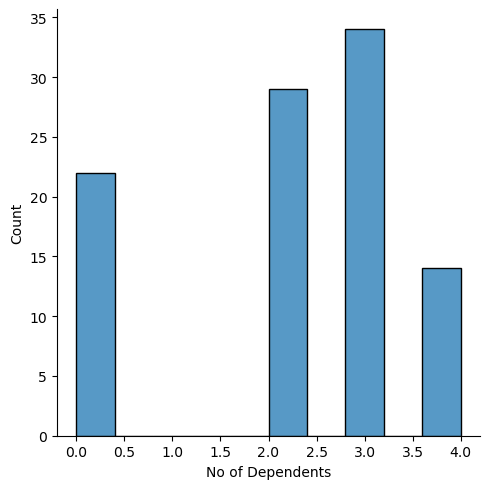

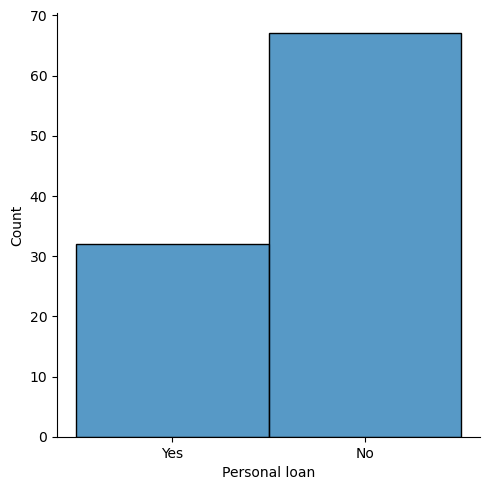

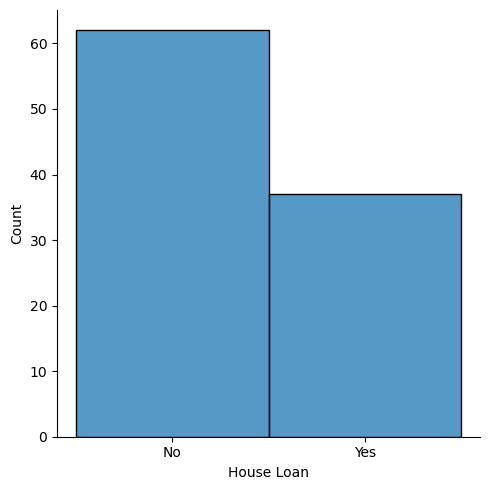

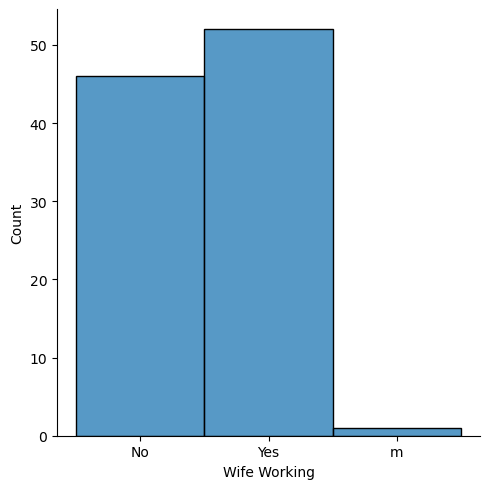

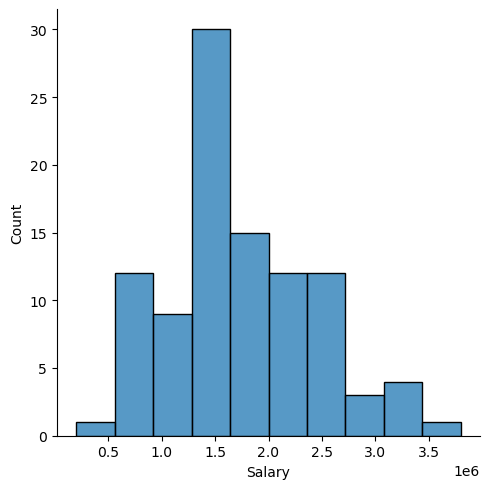

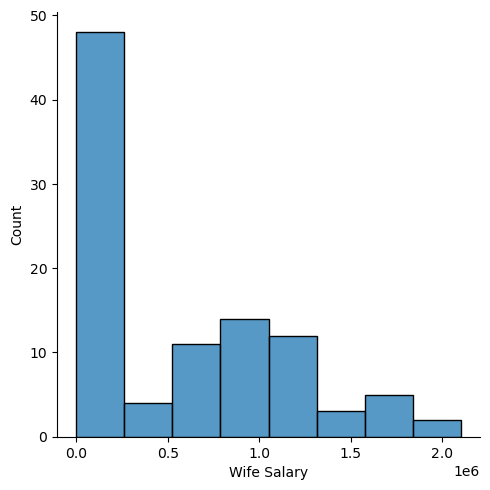

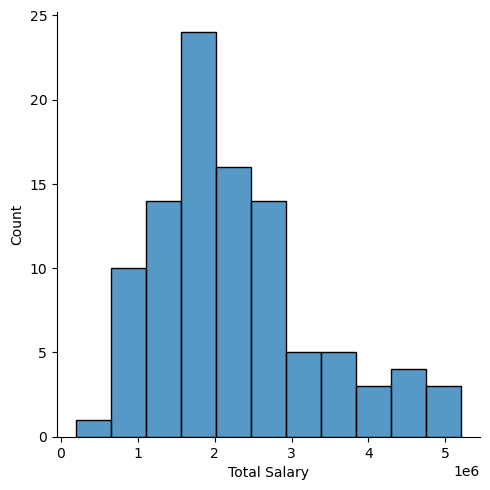

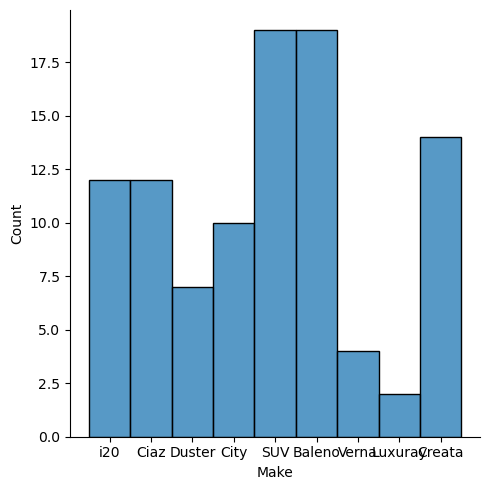

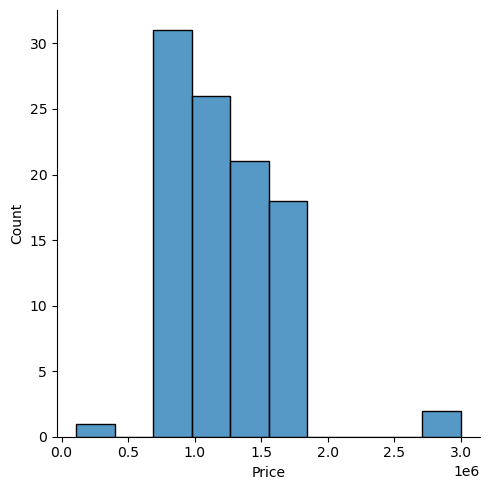

In [8]:
for col in df.columns:
    ax= sns.displot(df[col])
   # ax.set_xticklabels(rotation=45)
print(ax)
    

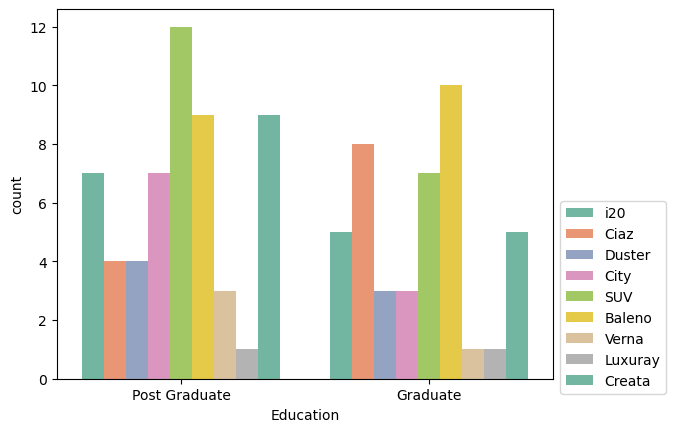

In [9]:
sns.countplot(x ='Education', hue = 'Make',  data = df, palette = 'Set2')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

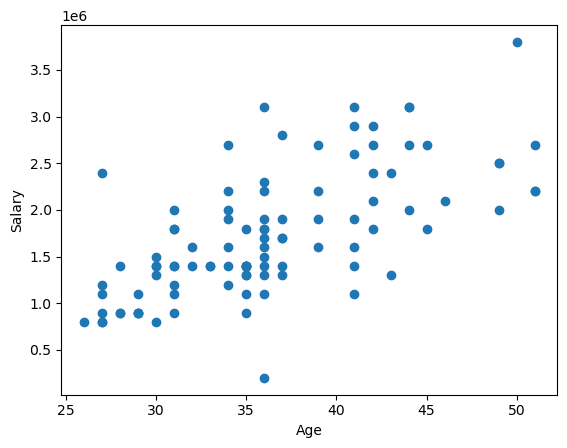

In [10]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(df['Age'],df['Salary'])

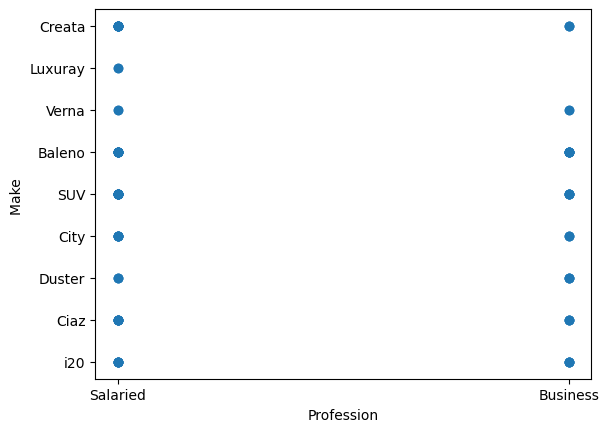

In [11]:
plt.xlabel('Profession')
plt.ylabel('Make ')
plt.scatter(df['Profession'],df['Make'])

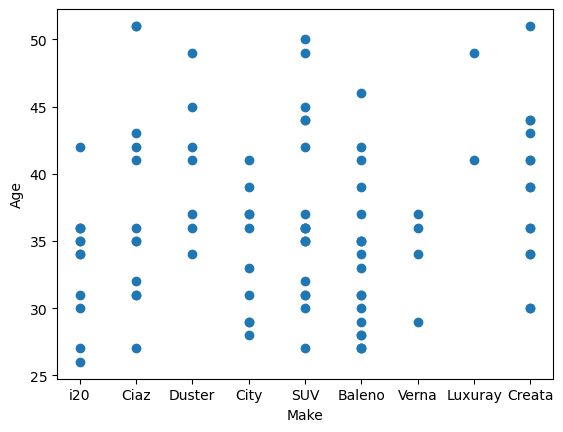

In [12]:
plt.xlabel('Make')
plt.ylabel('Age')
plt.scatter(df['Make'],df['Age'])

Relationship between consumers age and the vehicles they purchase

<AxesSubplot:xlabel='Make', ylabel='count'>

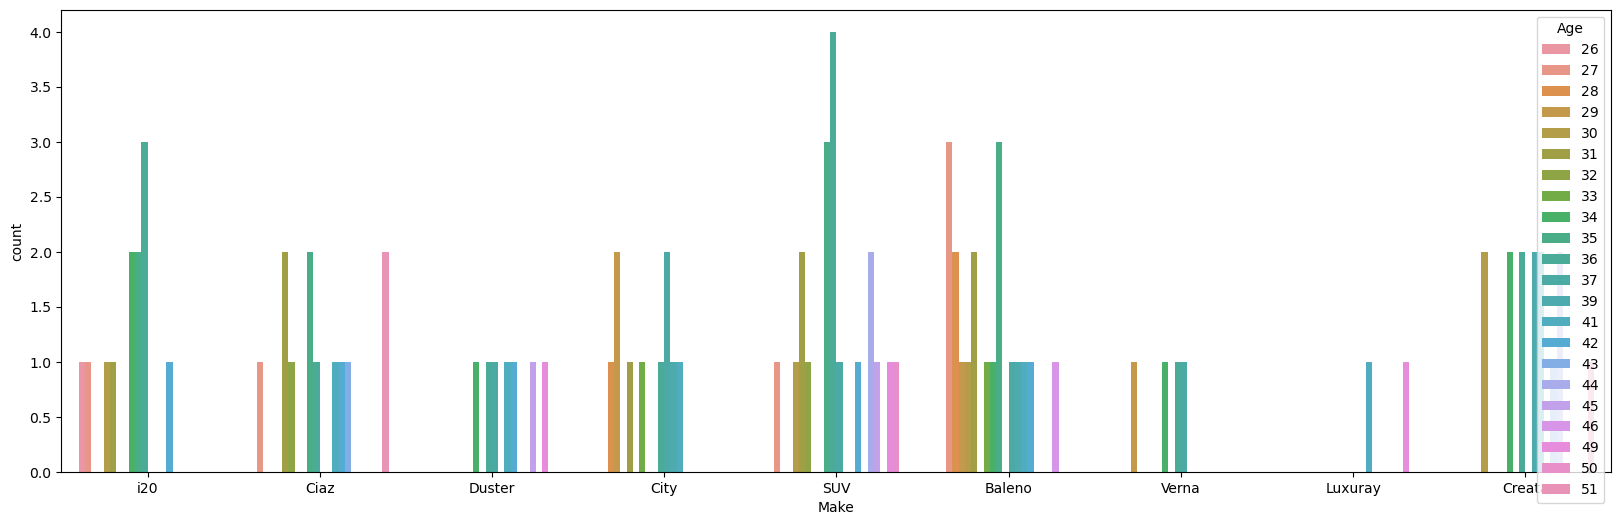

In [19]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Age")

Relation between consumer's profession and the vehicles they purchase

<AxesSubplot:xlabel='Make', ylabel='count'>

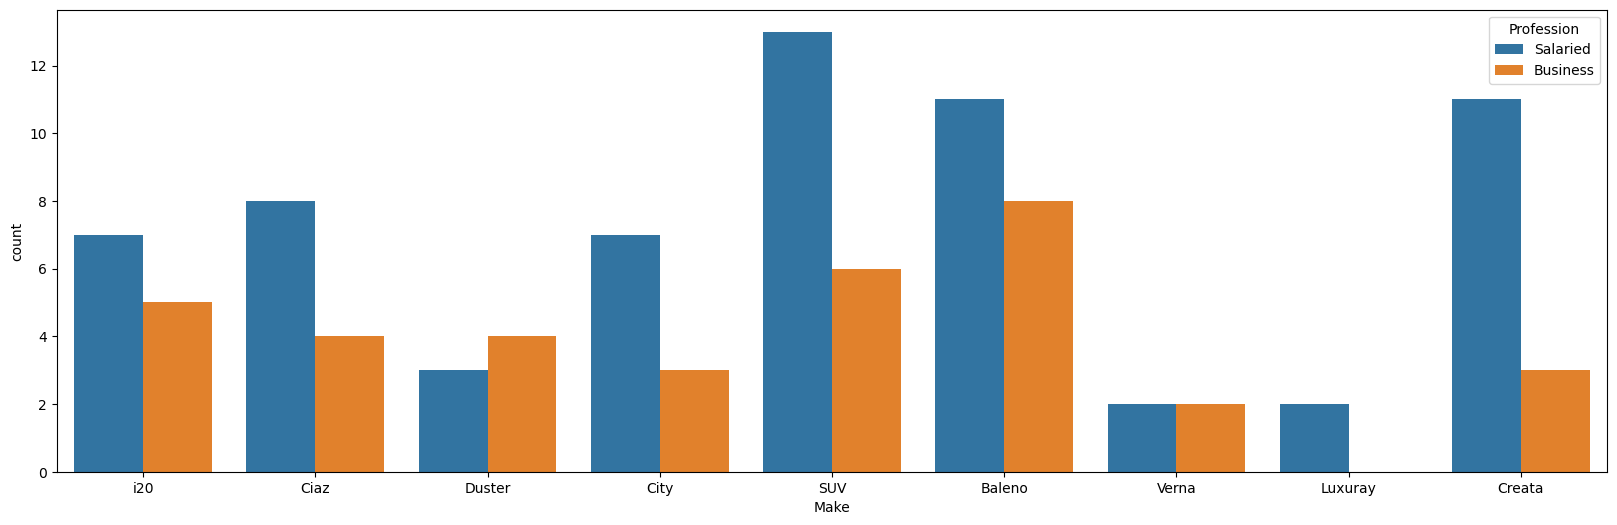

In [20]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Profession")

Relation between number of dependents on a consumer and the vehicles they purchase

<AxesSubplot:xlabel='Make', ylabel='count'>

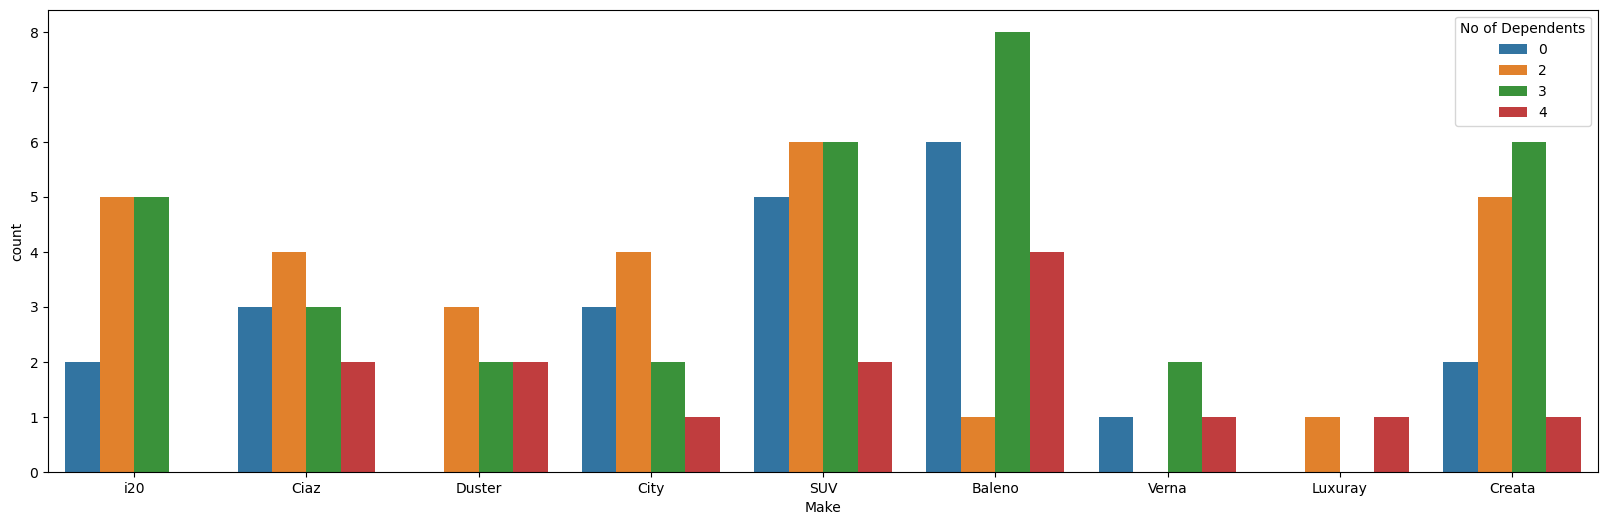

In [21]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="No of Dependents")


Relation between consumers' marital status and the vehicles they purchase

<AxesSubplot:xlabel='Make', ylabel='count'>

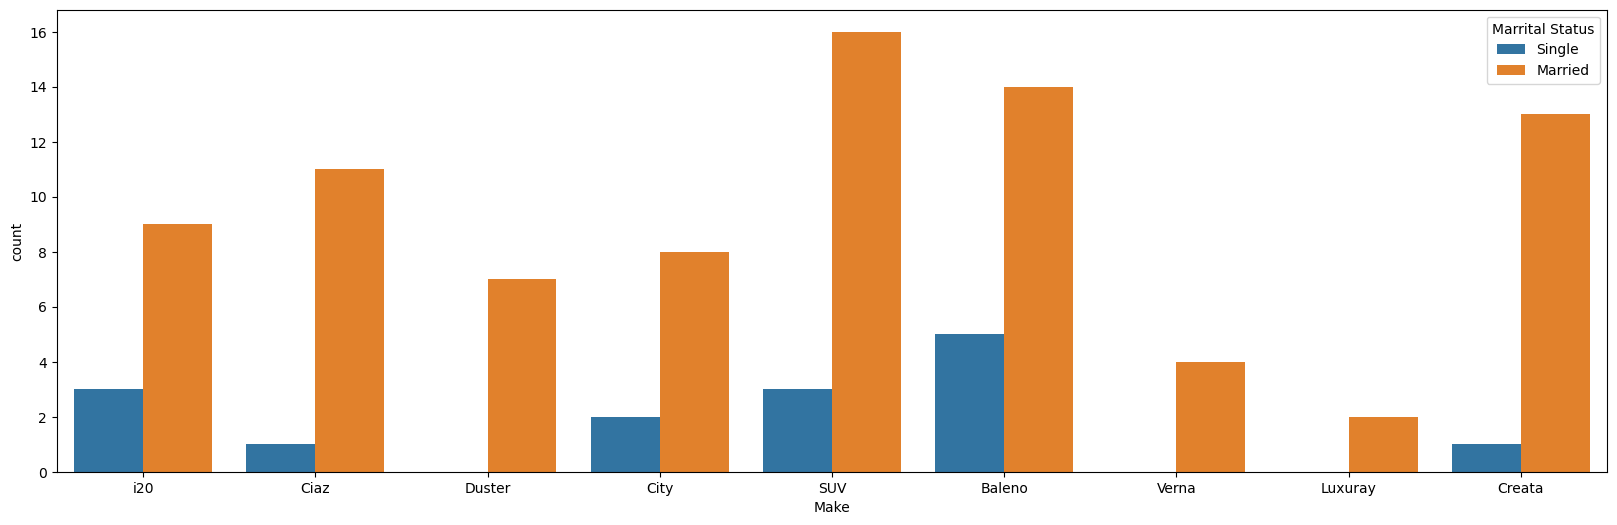

In [22]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Marrital Status")

Relation between consumers education and their age when vehicles they purchase

<AxesSubplot:xlabel='Age', ylabel='count'>

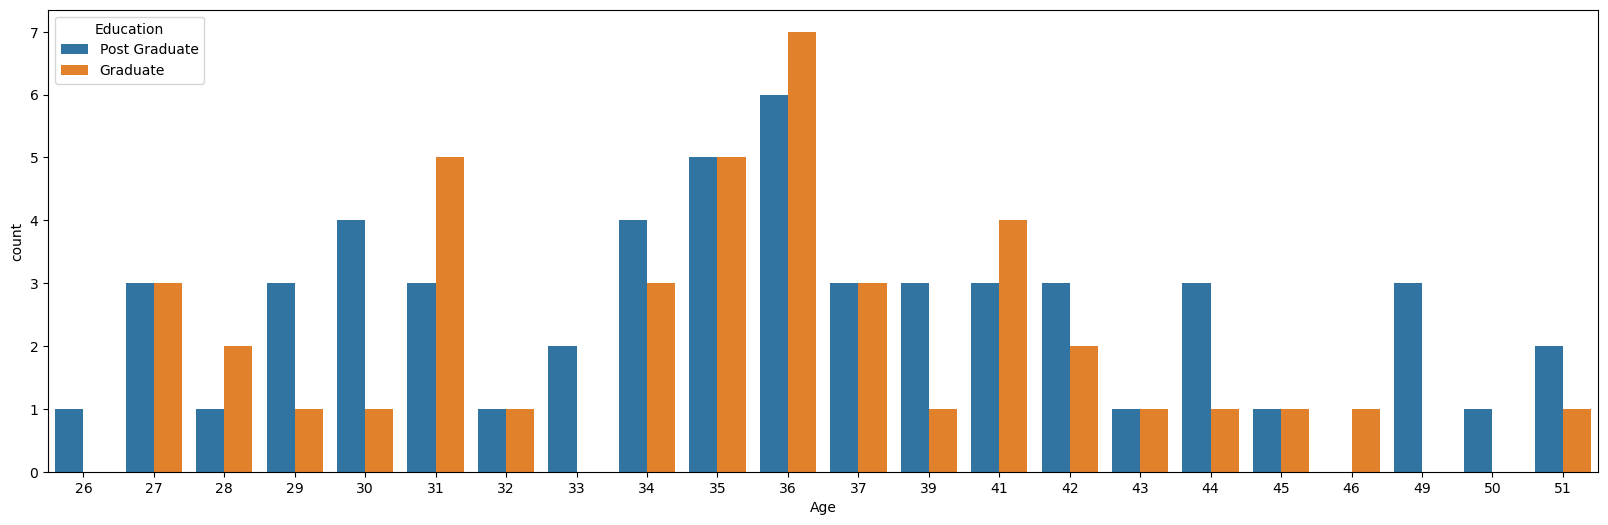

In [23]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age", data=df, hue="Education")

Relation between consumers total salary and the vehicles they purchase

<AxesSubplot:xlabel='Make', ylabel='count'>

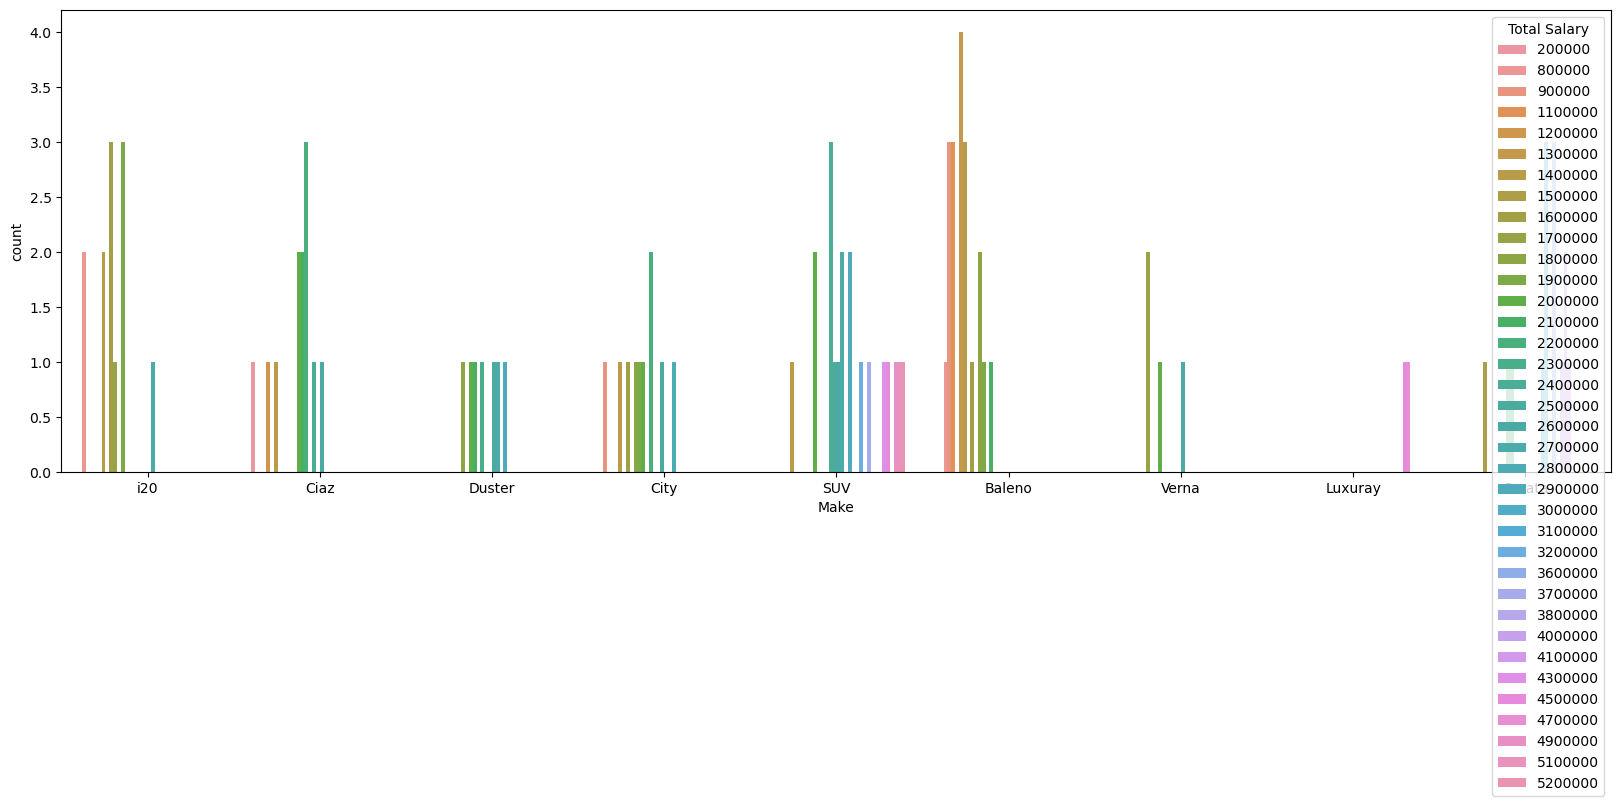

In [24]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=df, hue="Total Salary")

<AxesSubplot:>

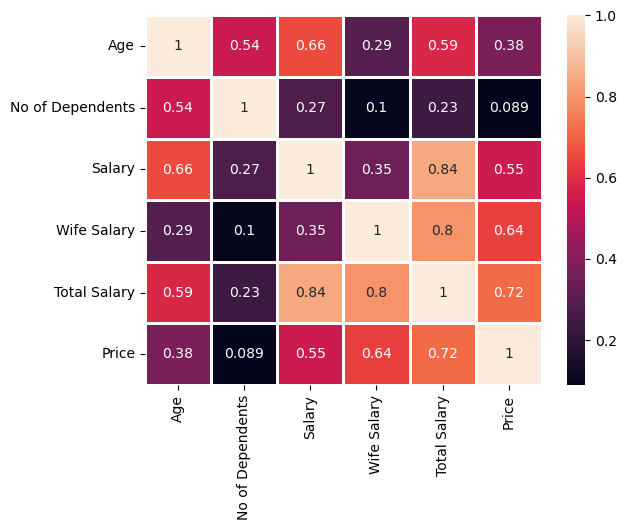

In [25]:
sns.heatmap(df.corr(),linewidths=1,linecolor='white', annot=True)


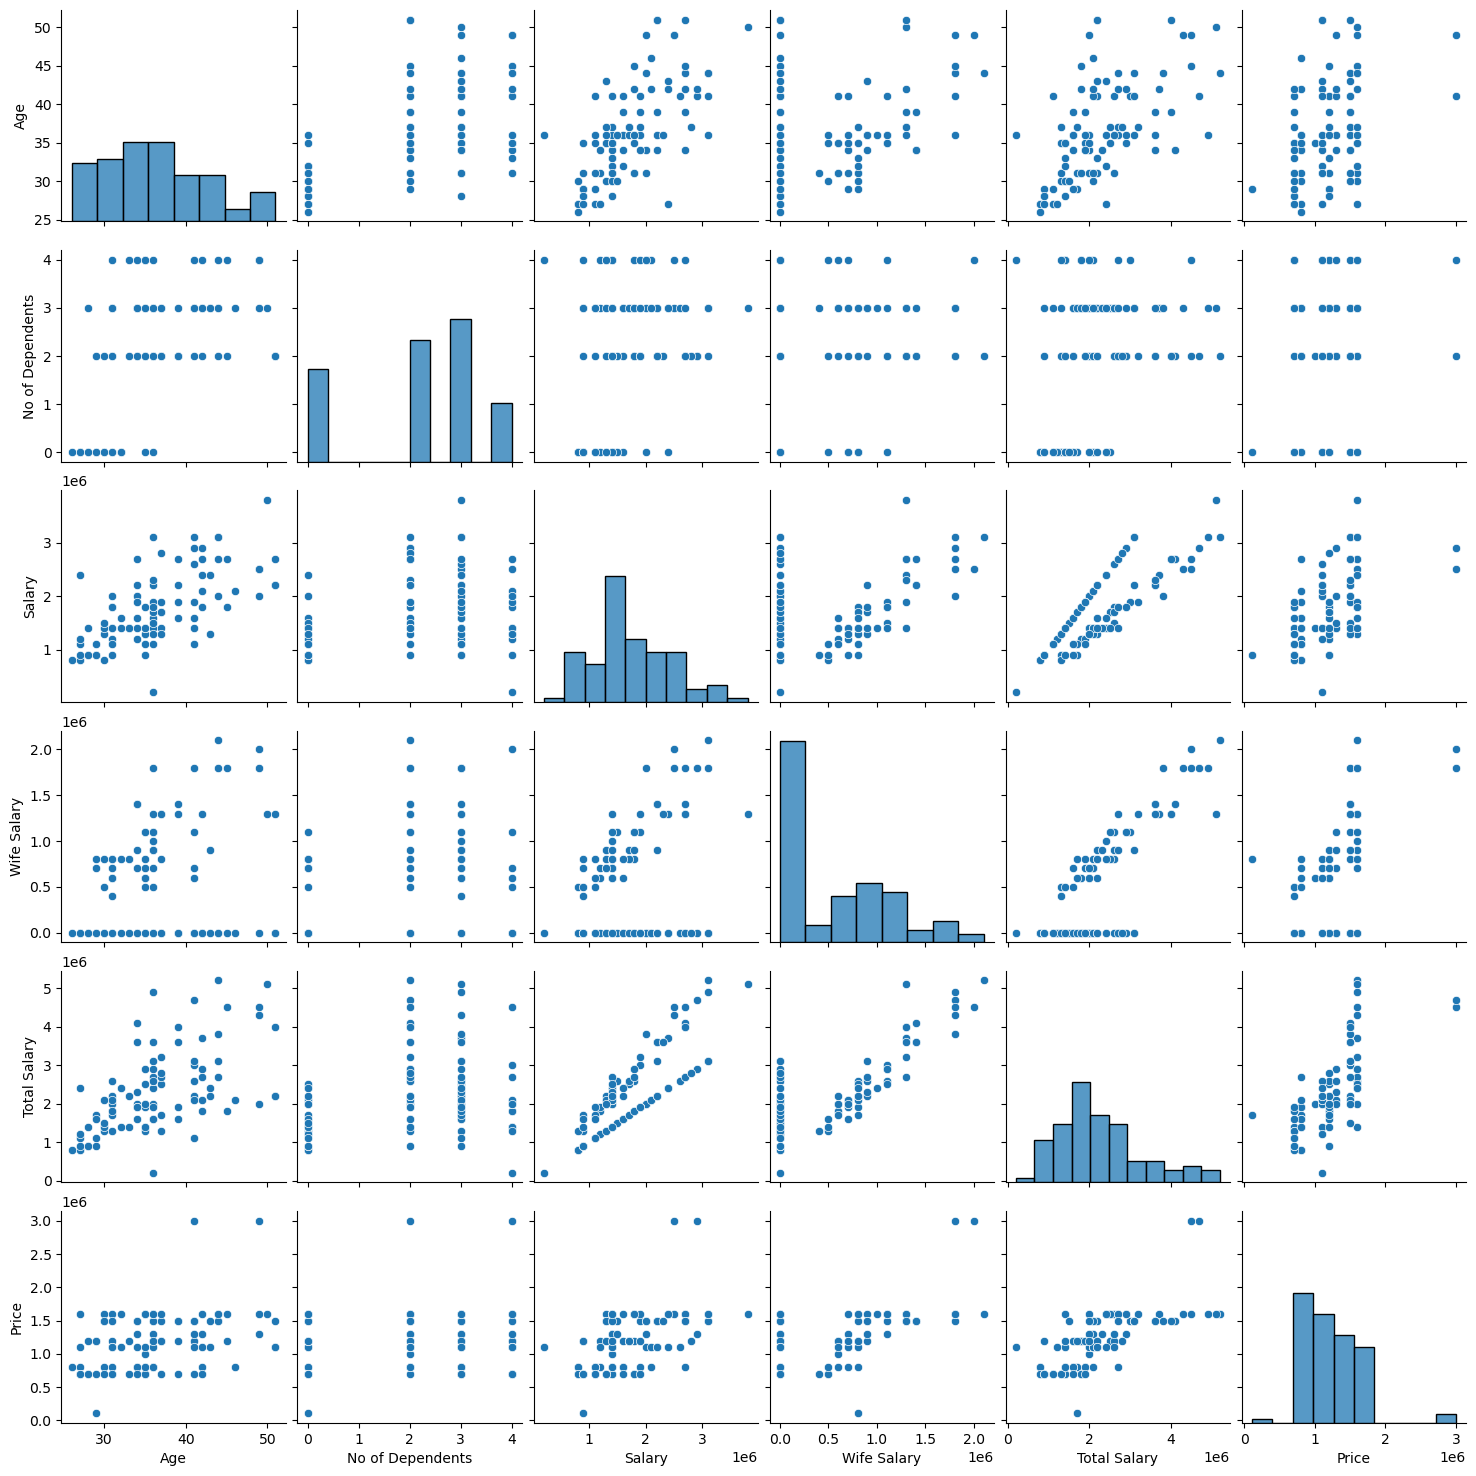

In [26]:
sns.pairplot(df)

In [27]:
from sklearn.preprocessing import OneHotEncoder
# define data
data = df[["Profession","Marrital Status","Education","Personal loan","House Loan","Wife Working"]]
print(data)
# define ordinal encoding
encoder = OneHotEncoder(sparse=False)
# transform data
result = encoder.fit_transform(data)
print(result)

   Profession Marrital Status      Education Personal loan House Loan  \
0    Salaried          Single  Post Graduate           Yes         No   
1    Salaried         Married  Post Graduate           Yes        Yes   
2    Business         Married       Graduate           Yes        Yes   
3    Business         Married  Post Graduate            No         No   
4    Salaried         Married  Post Graduate           Yes         No   
..        ...             ...            ...           ...        ...   
94   Business          Single       Graduate            No         No   
95   Salaried         Married  Post Graduate            No         No   
96   Business         Married       Graduate           Yes        Yes   
97   Salaried         Married  Post Graduate            No         No   
98   Salaried         Married  Post Graduate           Yes        Yes   

   Wife Working  
0            No  
1           Yes  
2            No  
3           Yes  
4           Yes  
..          ...

In [28]:
encoding = {"Profession":{"Salaried": 0, "Business": 1},
            "Marrital Status":{"Single": 0, "Married": 1},
            "Education":{"Graduate": 0, "Post Graduate": 1},
            "Personal loan":{"No": 0, "Yes": 1},
            "House Loan":{"No": 0, "Yes": 1},
            "Wife Working":{"No": 0, "Yes": 1}
            }

In [29]:
x = df[['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Price']]

obj_df = x.replace(encoding)
obj_df.describe()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,0.353535,0.848485,0.565657,2.181818,0.323232,0.373737,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,0.480500,0.360375,0.498193,1.335265,0.470091,0.486257,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [30]:
obj_df=obj_df.drop(["Wife Working"],axis=1)
obj_df.dtypes

Age                 int64
Profession          int64
Marrital Status     int64
Education           int64
No of Dependents    int64
Personal loan       int64
House Loan          int64
Salary              int64
Wife Salary         int64
Total Salary        int64
Price               int64
dtype: object

In [31]:
# Importing Important Libraries
from sklearn.preprocessing import StandardScaler


In [32]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    #preventing random initialization: 'init=k-means++'
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(obj_df)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


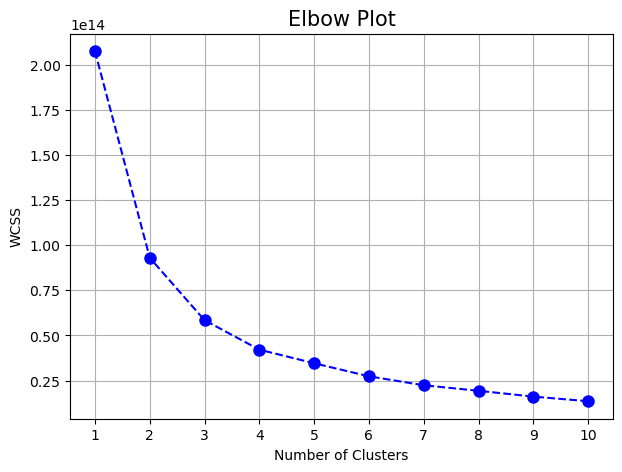

In [33]:
plt.figure(figsize=(7,5))
plt.plot(range(1,11),wcss,color='blue', linestyle='dashed', marker='o',
          markersize=8)
plt.title('Elbow Plot', size=15)
plt.grid()
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')
plt.show()

In [34]:
# optimum number of clusters: 3

kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(obj_df)
y_kmeans

array([2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 0, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 1,
       0, 2, 2, 0, 1, 2, 1, 0, 1, 0, 1])

In [35]:
df['cluster']=y_kmeans
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,cluster
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,2
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,1
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,2
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,1
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,1


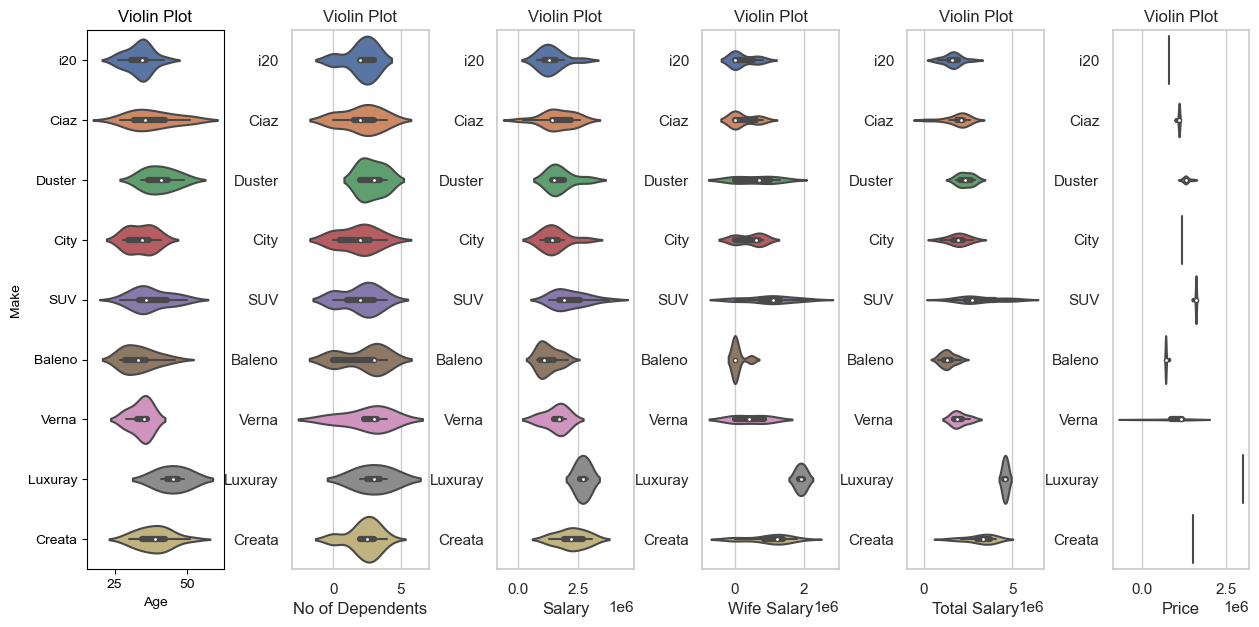

In [36]:
plt.figure(1,figsize=(15,7))
n = 0
for cols in ['Age','No of Dependents','Salary','Wife Salary','Total Salary','Price']:
    n += 1
    plt.subplot(1,6,n)
    sns.set(style = 'whitegrid')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x= cols, y = 'Make', data=df)
    plt.ylabel("Make" if n==1 else '')
    plt.title('Violin Plot')

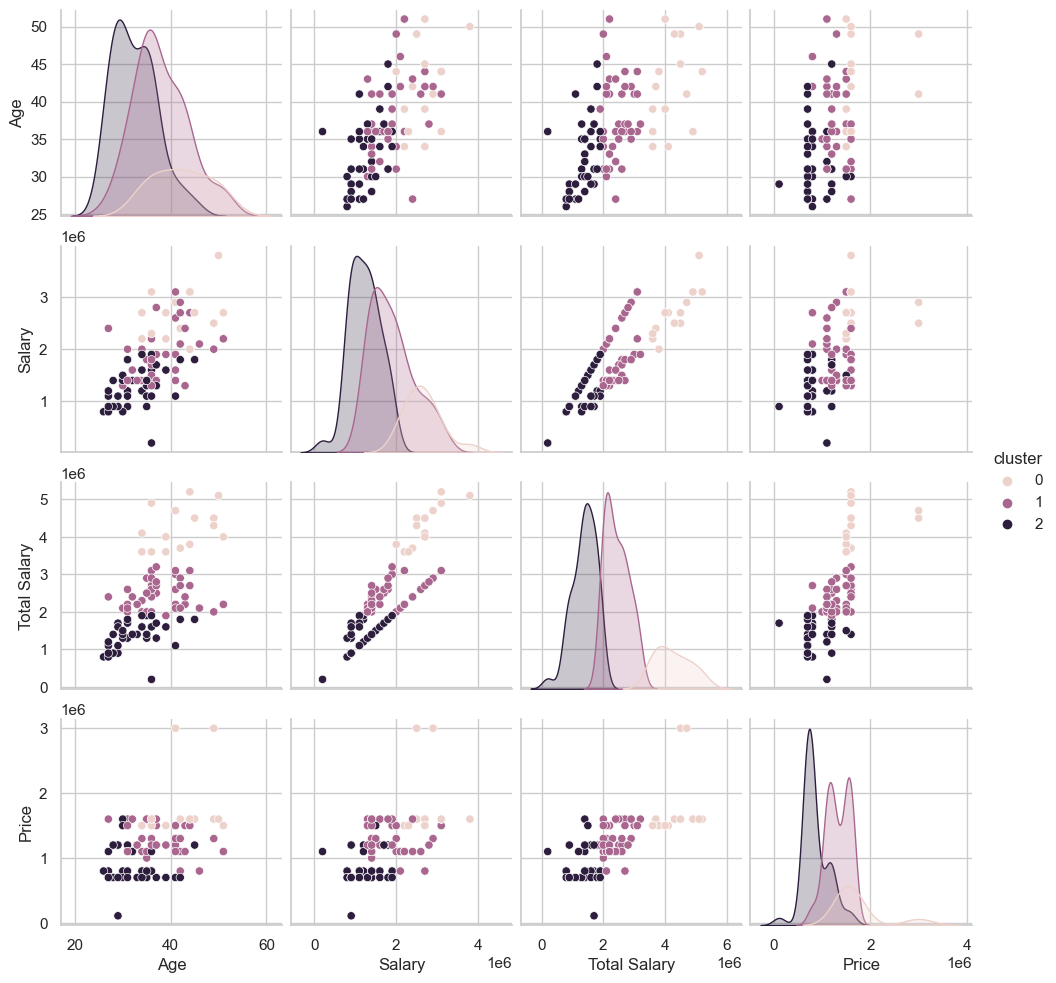

In [37]:
sns.pairplot(df,x_vars = ['Age','Salary','Total Salary','Price'], y_vars = ['Age','Salary','Total Salary','Price'], hue='cluster')